In [2]:
using QuantumDynamics
using Plots
using LinearAlgebra

In [3]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066
const mev2au = mev2invcm * invcm2au
const nm2au = 18.897

18.897

In [4]:
ϵ0 = 0.0 # This appears to not change the dynamics at all
v = 50*invcm2au

0.00022781650000000002

In [17]:
N = 8

8

In [18]:
H0 = Matrix{ComplexF64}(zeros(N, N))

8×8 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im

In [19]:
for i in 1:N
    H0[i,i] = ϵ0
    if i <= N-1
        H0[i, i+1] = v
    end
    if i >= 2
        H0[i, i-1] = v
    end
end

In [54]:
show(stdout, "text/plain", real.(H0))

8×8 Matrix{Float64}:
 0.0          0.000227817  0.0          0.0          0.0          0.0          0.0          0.0
 0.000227817  0.0          0.000227817  0.0          0.0          0.0          0.0          0.0
 0.0          0.000227817  0.0          0.000227817  0.0          0.0          0.0          0.0
 0.0          0.0          0.000227817  0.0          0.000227817  0.0          0.0          0.0
 0.0          0.0          0.0          0.000227817  0.0          0.000227817  0.0          0.0
 0.0          0.0          0.0          0.0          0.000227817  0.0          0.000227817  0.0
 0.0          0.0          0.0          0.0          0.0          0.000227817  0.0          0.000227817
 0.0          0.0          0.0          0.0          0.0          0.0          0.000227817  0.0

In [50]:
nsteps = 10000
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0

T = 50.0:50.0:500.0

β = 1 / (300 * 3.16683e-6) # T = 300K

dt = 0.25/au2fs

10.335343643937748

In [51]:
svec = Matrix{Float64}(zeros(1, N))
for i in 1:N
    svec[i] = i
end
svec

1×8 Matrix{Float64}:
 1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0

In [52]:
Jw = SpectralDensities.DrudeLorentz(λ=161.5*invcm2au, γ=41*invcm2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.0007358472950000001, 0.00018680953000000002, Float16(1.0), 0.18680953000000003, false)

In [55]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
@time t, ρs = TTM.propagate(; fbU=fbU,
                            Jw=[Jw],
                            β=β,
                            ρ0=ρ0,
                            dt=dt,
                            ntimes=nsteps,
                            rmax=15,
                            svec=svec,
                            extraargs=TEMPO.TEMPOArgs(; cutoff=1e-15, maxdim=1000),
                            path_integral_routine=TEMPO.build_augmented_propagator)

2262.328403 seconds (80.80 M allocations: 1.425 TiB, 6.42% gc time)


(0.0:10.335343643937748:103353.43643937747, ComplexF64[1.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.9999944560514638 - 4.2297732545258386e-22im -2.6829626090948176e-5 - 0.002354343294682629im … -3.4323369733984827e-19 + 1.40743316055934e-19im 2.53384279711943e-19 - 2.529886893964936e-19im; … ; 0.6738788002968866 + 2.138554502594683e-9im -0.040568562888810986 - 0.0038837752634535046im … -4.0845214907687586e-12 - 2.1287064749546907e-13im 2.986520623831882e-14 + 1.5782575409164753e-14im; 0.6738603523155575 + 2.1391608002969026e-9im -0.04056510805986836 - 0.0038834332821658215im … -4.086750834557963e-12 - 2.1601240931210997e-13im 2.987411154451304e-14 + 1.580148667543429e-14im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -2.682962609094669e-5 + 0.0023543432946826304im 5.543940851571337e-6 - 3.218725199566341e-20im … -3.225308009968064e-22 - 8.134417358019168e-22im 5.898049174873817e-22 + 6.030634069955178e-22im; … ; -0.040568562630271233 + 0.003883778681403087im 0.29498961

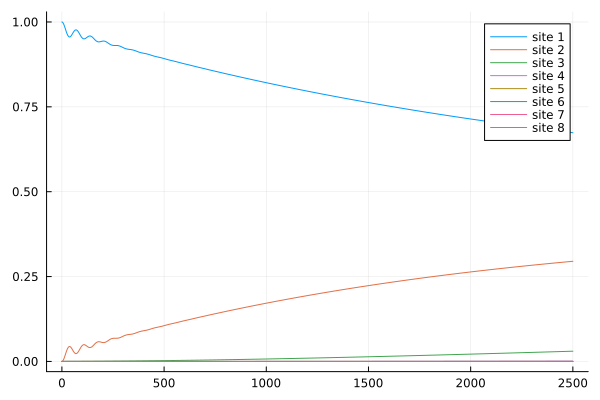

In [56]:
plot(t.*au2fs, real.(ρs[:, 1, 1]), label="site 1")
plot!(t.*au2fs, real.(ρs[:, 2, 2]), label="site 2")
plot!(t.*au2fs, real.(ρs[:, 3, 3]), label="site 3")
plot!(t.*au2fs, real.(ρs[:, 4, 4]), label="site 4")
plot!(t.*au2fs, real.(ρs[:, 5, 5]), label="site 5")
plot!(t.*au2fs, real.(ρs[:, 6, 6]), label="site 6")
plot!(t.*au2fs, real.(ρs[:, 7, 7]), label="site 7")
plot!(t.*au2fs, real.(ρs[:, 8, 8]), label="site 8")

In [57]:
MSD = []
for i in 1:10000
    s = 0.0
    for j in 1:N
        s += real(ρs[i, j, j])*(j-1)^2
    end
    push!(MSD, s)
end

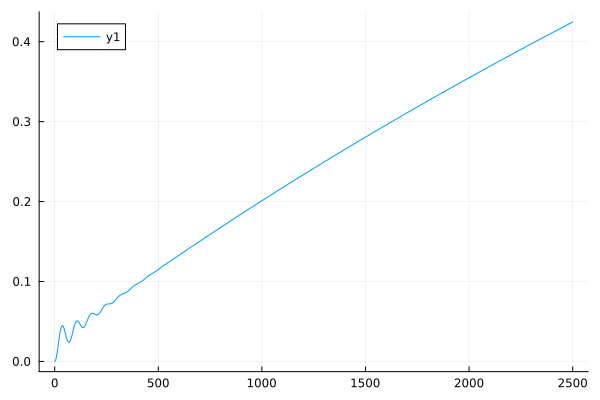

In [58]:
plot((t[1:10000]).*au2fs, MSD)

In [32]:
λs = repeat([161.5], N) * invcm2au
γs = repeat([41.0], N) * invcm2au
JwH = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()
for (j, (λ, γ)) in enumerate(zip(λs, γs))
    push!(JwH, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(N, N)
    op[j, j] = 1.0
    push!(sys_ops, op)
end


@time times_HEOM, ρs_HEOM = HEOM.propagate(;
                                    Hamiltonian=H0,
                                    ρ0,
                                    β,
                                    dt,
                                    ntimes=nsteps,
                                    Jw=JwH,
                                    sys_ops=sys_ops,
                                    num_modes=3,
                                    Lmax=5)

LoadError: InterruptException:

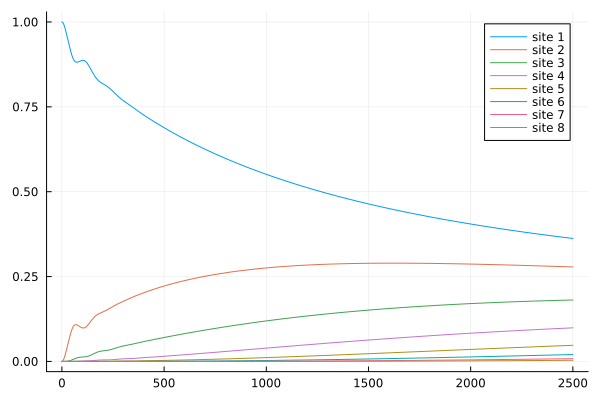

In [33]:
plot(times_HEOM.*au2fs, real.(ρs_HEOM[:, 1, 1]), label="site 1")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 2, 2]), label="site 2")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 3, 3]), label="site 3")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 4, 4]), label="site 4")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 5, 5]), label="site 5")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 6, 6]), label="site 6")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 7, 7]), label="site 7")
plot!(times_HEOM.*au2fs, real.(ρs_HEOM[:, 8, 8]), label="site 8")

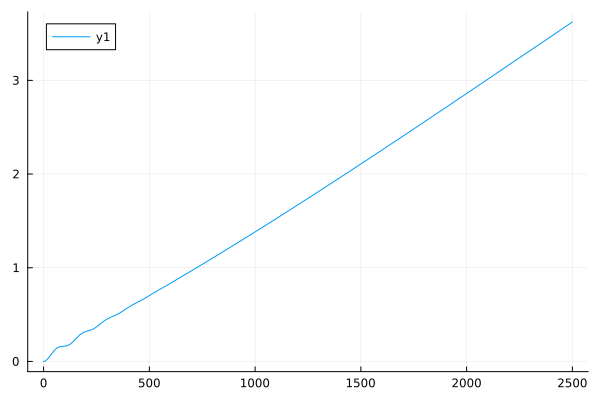

In [49]:
MSD_HEOM = []
for i in 1:10000
    s = 0.0
    for j in 1:N
        s += real(ρs_HEOM[i, j, j])*(j-1)^2
    end
    push!(MSD_HEOM, s)
end

plot((times_HEOM[1:10000]).*au2fs, MSD_HEOM)